# Demo - Analytics e Agentes

# Applied Machine Learning - Análises de Dados criadas com auxílio de Gen AI (testar com ChatGPT, Perplexity, Gemini etc.)

### Prof. Ahirton Lopes (profahirton.lopes@fiap.com.br)

In [ ]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression


1. Carregando os dados

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving manutencao_maquinas.csv to manutencao_maquinas.csv
Saving logistica_estoque.csv to logistica_estoque.csv
Saving planejamento_producao.csv to planejamento_producao.csv
Saving producao_textil.csv to producao_textil.csv
Saving qualidade_produto.csv to qualidade_produto.csv
User uploaded file "manutencao_maquinas.csv" with length 5568 bytes
User uploaded file "logistica_estoque.csv" with length 56720 bytes
User uploaded file "planejamento_producao.csv" with length 87594 bytes
User uploaded file "producao_textil.csv" with length 96617 bytes
User uploaded file "qualidade_produto.csv" with length 52474 bytes


In [ ]:
# Carregar os dados
producao = pd.read_csv('producao_textil.csv')
qualidade = pd.read_csv('qualidade_produto.csv')
manutencao = pd.read_csv('manutencao_maquinas.csv')
logistica = pd.read_csv('logistica_estoque.csv')
planejamento = pd.read_csv('planejamento_producao.csv')

# Configuração para melhor visualização dos gráficos
plt.rcParams['figure.figsize'] = (14, 8)

# 2 . Análise de Dados (Powered by ChatGPT/Perplexity!) 🚀

## Eficiência por Tipo de Produto e Material

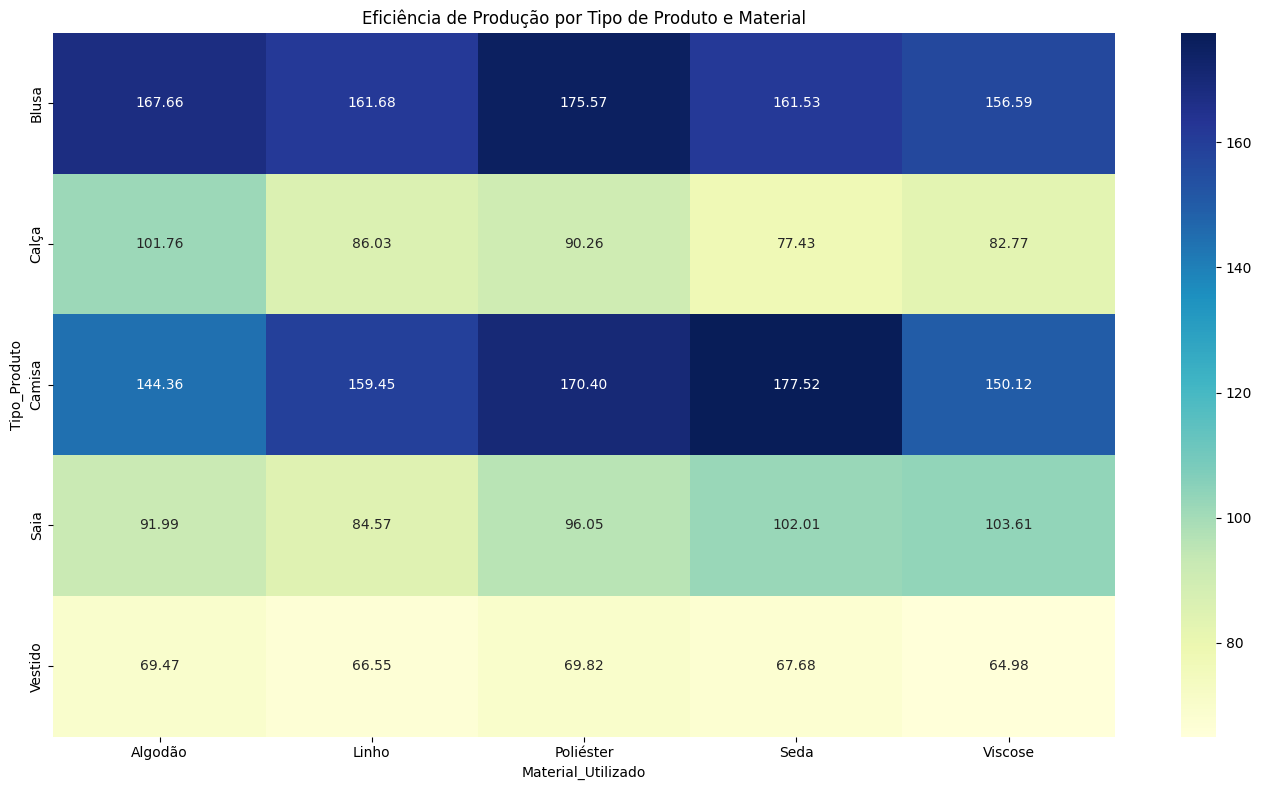

ANOVA para eficiência entre materiais: F-statistic = 1.56, p-value = 0.1840


In [ ]:
def plot_efficiency_analysis():
    efficiency_by_material = producao.groupby(['Tipo_Produto', 'Material_Utilizado'])['Eficiencia_Producao'].mean().unstack()

    plt.figure(figsize=(14, 8))
    sns.heatmap(efficiency_by_material, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('Eficiência de Produção por Tipo de Produto e Material')
    plt.tight_layout()
    plt.show()

    # ANOVA para testar diferenças significativas entre materiais
    materials = producao['Material_Utilizado'].unique()
    material_groups = [producao[producao['Material_Utilizado'] == material]['Eficiencia_Producao'] for material in materials]
    f_statistic, p_value = stats.f_oneway(*material_groups)
    print(f"ANOVA para eficiência entre materiais: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")

plot_efficiency_analysis()

## Tendências de Qualidade ao Longo do Tempo

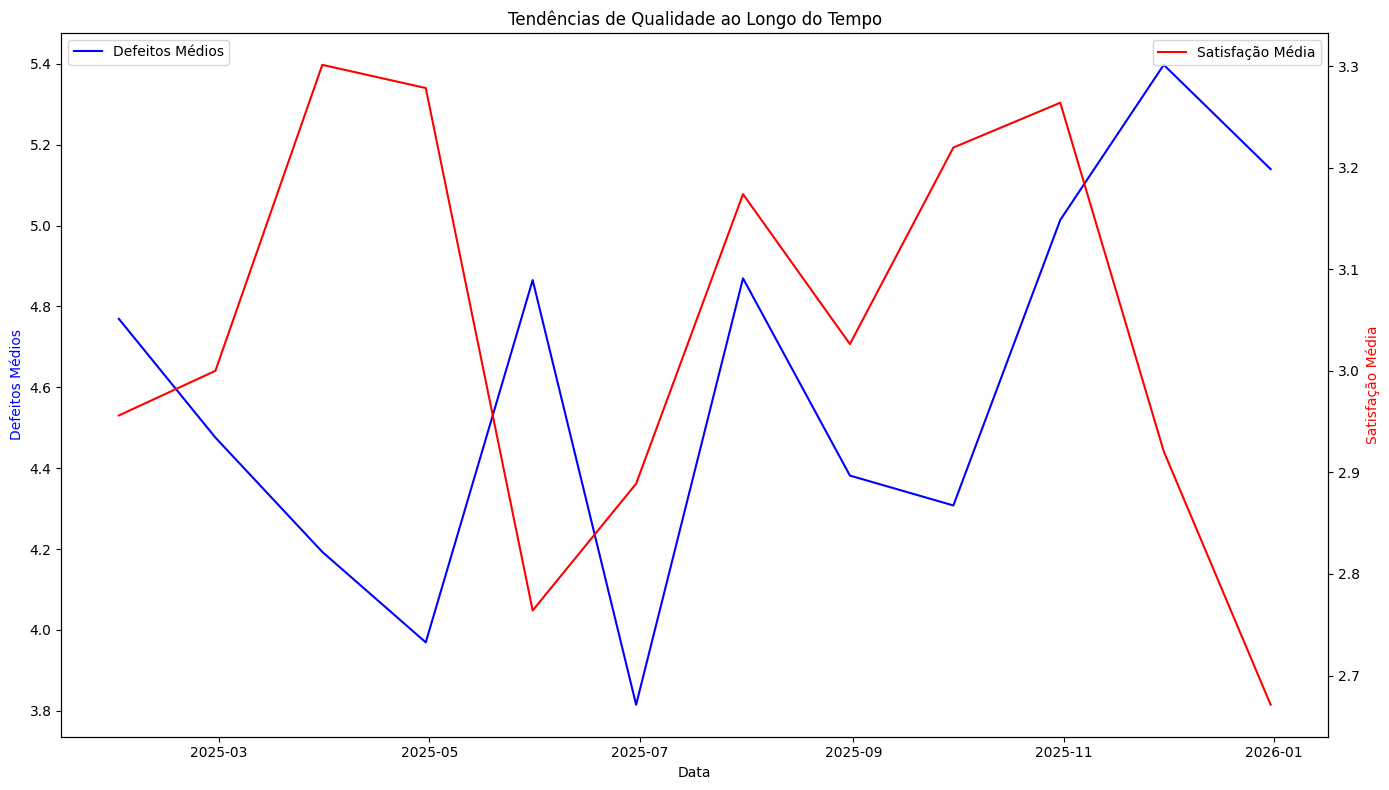

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_quality_trends():
    # Certifica-se de que a coluna está em formato datetime
    qualidade['Data_Inspecao'] = pd.to_datetime(qualidade['Data_Inspecao'])

    # Define como índice e aplica resampling correto
    qualidade_mensal = qualidade.set_index('Data_Inspecao').resample('ME').agg({
        'Defeitos': 'mean',
        'Satisfacao_Cliente': 'mean'
    })

    # Criando a figura e os eixos
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx()

    # Plotando os dados
    ax1.plot(qualidade_mensal.index, qualidade_mensal['Defeitos'], 'b-', label='Defeitos Médios')
    ax2.plot(qualidade_mensal.index, qualidade_mensal['Satisfacao_Cliente'], 'r-', label='Satisfação Média')

    # Configuração dos rótulos
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Defeitos Médios', color='b')
    ax2.set_ylabel('Satisfação Média', color='r')

    plt.title('Tendências de Qualidade ao Longo do Tempo')

    # Ajuste de legendas corretamente
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

# Chamando a função
plot_quality_trends()

## Impacto da Manutenção na Produção

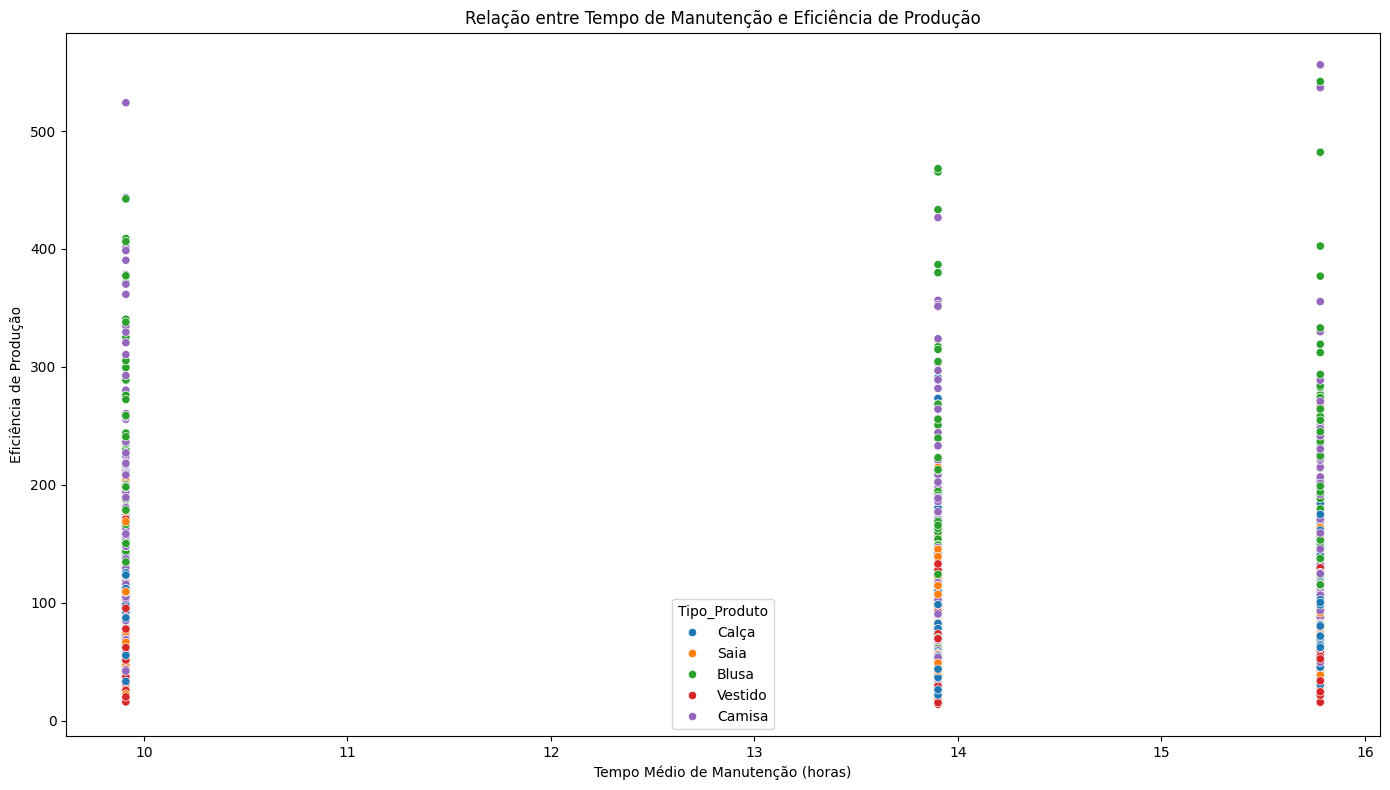

In [ ]:
def analyze_maintenance_impact():
    producao['Tipo_Maquina'] = producao['Linha_Producao'].map({
        'Linha 1': 'Máquina de Costura',
        'Linha 2': 'Máquina de Corte',
        'Linha 3': 'Máquina de Estamparia'
    })

    manutencao_avg = manutencao.groupby('Tipo_Maquina')['Tempo_Manutencao'].mean().reset_index()
    producao_with_maintenance = pd.merge(producao, manutencao_avg, on='Tipo_Maquina')

    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=producao_with_maintenance, x='Tempo_Manutencao', y='Eficiencia_Producao', hue='Tipo_Produto')
    plt.title('Relação entre Tempo de Manutenção e Eficiência de Produção')
    plt.xlabel('Tempo Médio de Manutenção (horas)')
    plt.ylabel('Eficiência de Produção')
    plt.tight_layout()
    plt.show()

analyze_maintenance_impact()

## Otimização de Estoque e Planejamento

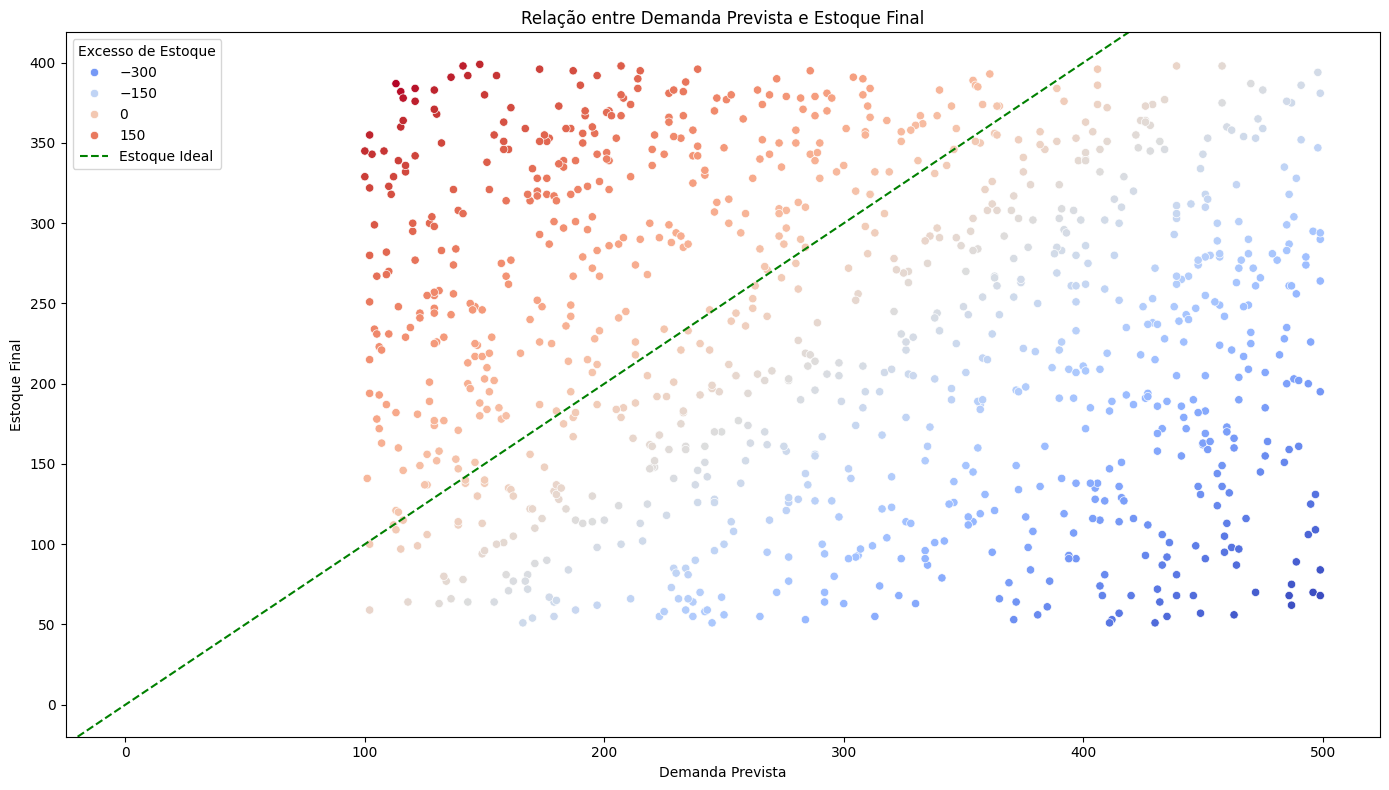

In [ ]:
def analyze_stock_optimization():
    merged_data = pd.merge(logistica, planejamento, on='ID_Produto')
    merged_data['Excesso_Estoque'] = merged_data['Estoque_Final'] - merged_data['Demanda_Prevista']

    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=merged_data, x='Demanda_Prevista', y='Estoque_Final', hue='Excesso_Estoque', palette='coolwarm')
    plt.title('Relação entre Demanda Prevista e Estoque Final')
    plt.xlabel('Demanda Prevista')
    plt.ylabel('Estoque Final')
    plt.axline([0, 0], [1, 1], color='green', linestyle='--', label='Estoque Ideal')
    plt.legend(title='Excesso de Estoque')
    plt.tight_layout()
    plt.show()

analyze_stock_optimization()